In [1]:
# Dependencies - General Stuff
import sys
import os
import numpy as np
import pandas as pd
import os

# strfpy
from module.strfpy.makePSTH import SpikeResponse
from module.strfpy import findDatasets, preprocSound, strfSetup, trnDirectFit, plotTfrep, calcSegmentedModel
# from strflab import preprocess_sound, srdata2strflab, linInit, strfData, trnDirectFit, strfOpt

import pynwb
from matplotlib import pyplot as plt
# %matplotlib widget
plt.ion();

In [2]:
# nwb_file = '/aquila_ssd2/lthomas/songephys_data/OperantEphys/HpiPur2667F/sites/HpiPur2667F_site03_240905_133829_pb_op/HpiPur2667F_site03_240905_133829_pb_op_ks4_lat_250215.nwb'

nwb_file = '/Users/frederictheunissen/Working Data/OperantEphys/NWB_Files/HpiPur2667F_site02_240905_072851_pb_op_ks4_lat_250215.nwb'
# Load the nwb file
preprocOptions = {} # we'll leave this empty and use default options
nwb_io =  pynwb.NWBHDF5IO(nwb_file, mode='r')
nwb = nwb_io.read()
units = nwb.units.to_dataframe()
# load the good units
good_units = units[units.group == 'good']


In [3]:
# sample a random unit
unit = good_units.sample().iloc[0]
unit = good_units.loc[73]
print("Processing unit: ", unit.name)

Processing unit:  73


In [4]:
nwb

root pynwb.file.NWBFile at 0x5673905616
Fields:
  acquisition: {
    LFP <class 'pynwb.ecephys.ElectricalSeries'>,
    audcode_events <class 'hdmf.common.table.DynamicTable'>,
    audio <class 'pynwb.base.TimeSeries'>,
    ttl_events <class 'hdmf.common.table.DynamicTable'>,
    unit_waveforms <class 'hdmf.common.table.DynamicTable'>
  }
  devices: {
    cambridge_H10.prb <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    cambridge_H10.prb <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Thomas, Logan']
  file_create_date: [datetime.datetime(2025, 2, 16, 13, 27, 59, 522794, tzinfo=tzoffset(None, -28800))]
  identifier: a8a5ebd1-1ed4-49c5-a6d1-a4af22effe96
  institution: University of California, Berkeley
  intervals: {
    operant_trials <class 'pynwb.epoch.TimeIntervals'>,
    playback_trials <class 'pynwb.epoch.TimeIntervals'>,
    pyoperant_experiments <class 'pynwb.epoch.TimeIntervals'>,
    unit_intervals <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Theunissen Lab
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    stimuli_info <class 'pynwb.base.ProcessingModule'>,
    stimuli_spectrograms <class 'pynwb.base.ProcessingModule'>
  }
  session_description: OperantEphys/HpiPur2667F
  session_start_time: 2024-09-05 07:28:51-07:00
  stimulus: {
    So_Stim_0_BlaBla0506_15.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_0_BlaBla3637M_1.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_0_Gre152M_4.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_0_MbrYel0291_67953461.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_0_PeLPurpleOrange_37.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_0_PeLRedRed_63.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_10_LblBla4548_28.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_11_LblBla4548_19.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_1_BlaBla0506_12.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_1_BlaBla3637M_2.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_1_LblBla4548_33.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_1_MbrYel0291_67111451.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_1_PeLPurpleOrange_34.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_1_PeLRedRed_59.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_20_XXXOra31XXM_20.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_BlaBla0506_8.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_BlaBla3637M_3.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_Gre152M_6.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_LblBla4548_35.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_MbrYel0291_661819131.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_PeLPurpleOrange_39.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_PeLRedRed_64.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_2_XXXOra31XXM_3.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_BlaBla0506_6.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_BluRas61dd_8.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_Gre152M_1.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_LblBla4548_5.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_MbrYel0291_661834382.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_PeLPurpleOrange_40.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_3_PeLRedRed_58.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_4_Gre152M_3.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_4_LblBla4548_8.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_4_MbrYel0291_661834381.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_4_PeLRedRed_60.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_5_BluRas61dd_22.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_5_PeLRedRed_56.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_5_XXXOra31XXM_15.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_6_BluRas61dd_9.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_6_LblBla4548_49.wav <class 'pynwb.base.TimeSeries'>,
    So_Stim_6_PeLPurpleOrange_41.wav <class 'pynwb.base.TimeS

In [ ]:
for stim in nwb.stimulus:
    plt.figure()
    stim_data = np.array(nwb.stimulus[stim].data)
    t_stim = np.arange(len(stim_data))/nwb.stimulus[stim].rate
    plt.title(stim)
    plt.plot(t_stim,np.array(nwb.stimulus[stim].data))

In [5]:
# Preprocess sound stimulus and segment

respChunkLen = 100 # ms of stim to use in each chunk
segmentBuffer = 30 # ms to add at the beginning of each segment
nLaguerre = 25 # number of laguerre functions to use
feature = 'spect_windows'
event_types = 'onoff_feature'
nPoints = 150 # number of points to use in the kernel
mult_values = False
# srData = preprocSound.generate_srData_nwb(nwb, 'playback_trials',unit.name)
srData = preprocSound.preprocess_sound_nwb(nwb_file, 'playback_trials', unit.name, preprocess_type='ft')
calcSegmentedModel.preprocess_srData(srData, plot=False, respChunkLen=respChunkLen, segmentBuffer=segmentBuffer, tdelta=0, plotFlg = False)


              kilosort_dir  kilosort_id group        ks_x       ks_y  \
id                                                                     
73  ks4_lat_250215/shank_1           75  good  162.010559  50.489616   

                                          spike_times electrodes  
id                                                                
73  [0.06543333333333333, 0.10373333333333333, 0.1...       [30]  


/Users/frederictheunissen/Code/strfPy/module/strfpy/timeFreq.py:29: RuntimeWarning: divide by zero encountered in log10
  normedS = 20 * np.log10(normedS)


A colormap named "SpectroColorMap" is already registered.


In [6]:
# Calculate the average response at onsets and offsets

meansOnOff = np.zeros((2,nPoints))
nEventsOnOff = np.zeros((2,1))
responseAvg = 0
stimLenTot = 0
for ds in srData['datasets']:
    events = ds['events']
    nEvents = len(events['index'])
    stimLen = ds['resp']['psth_smooth'].shape[0]
    responseAvg += np.sum(ds['resp']['psth_smooth'])
    stimLenTot += stimLen
    for iEvent in range(nEvents):
        startInd = events['index'][iEvent]
        endInd = startInd + nPoints
        if (endInd>stimLen):
            endInd = stimLen
        if (events['onoff_feature'][iEvent][0] == 1 ):
            meansOnOff[0,0:endInd-startInd] = meansOnOff[0,0:endInd-startInd] + ds['resp']['psth_smooth'][startInd:endInd]
            nEventsOnOff[0] += 1
        else:
            meansOnOff[1,0:endInd-startInd] = meansOnOff[1,0:endInd-startInd] + ds['resp']['psth_smooth'][startInd:endInd]
            nEventsOnOff[1] += 1

meansOnOff[0,:] /= nEventsOnOff[0]
meansOnOff[1,:] /= nEventsOnOff[1]
responseAvg /= stimLenTot

meansOnOff[0,:] -= responseAvg
meansOnOff[1,:] -= responseAvg




In [7]:
# Calculate the segmented encoding models.
srData, pca, ridge, ridge_conv_filter, laguerre_args, r2s = calcSegmentedModel.process_unit(srData, feature=feature, nLaguerre=nLaguerre,nPoints=nPoints,  plot=False, do_test_set=False)
kernels = ridge_conv_filter.coef_.reshape((2,nPoints))
results = dict({
    'uid': unit.name,
    'kernel_0': kernels[0,:],
    'kernel_1': kernels[1,:],
    'laguerre_args': laguerre_args,
    'r2_seg': r2s[0],
    'r2_segid': r2s[2],
})

Fitting PCA to Feature
Fitting convolutional kernel
Fitting laguerre parameters
Fit the laguerre convolved features to the response


/Users/frederictheunissen/anaconda3/envs/ephys/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/frederictheunissen/anaconda3/envs/ephys/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [8]:
print('R2 for seg', results['r2_seg'])
print('R2 for seg+id:', results['r2_segid'])

R2 for seg 0.17238594928398332
R2 for seg+id: 0.3971125837228768


In [9]:
events = srData['datasets'][0]['events']
nf = events['spect_windows'].shape[1]
nt = events['spect_windows'].shape[2]
tfrep = srData['datasets'][0]['stim']['tfrep']
npcs = pca.n_components_


In [10]:
nt

100

In [11]:
laguerre_args

array([[ 23.93664581,   3.37492303,  -6.76155124,  10.36181042,
        -10.91540409,   6.02341865,  -1.80016219],
       [ 12.93034523,   0.65968125,  -0.86985416,  46.95447075,
        -98.42673774,  85.23506581, -27.25410495]])

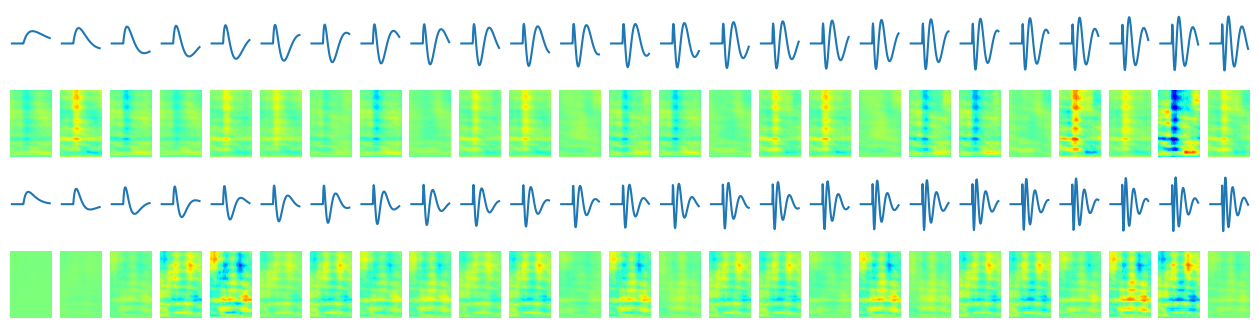

In [22]:
# Plot the On and Off filters

plt.figure(figsize=(16, 4), dpi=100)
strfLGOn = np.zeros((nLaguerre, nf, nt))
strfLGOff = np.zeros((nLaguerre, nf, nt))
x_t = np.arange(nt-segmentBuffer)
x_plot = np.arange(nt)-segmentBuffer

for iL in range(nLaguerre):
    istart = 2*npcs*iL
    iend = istart+npcs
    strfLGOn[iL,:,:] = np.dot(ridge.coef_[istart:iend], pca.components_).reshape((nf,nt))
    strfLGOff[iL,:,:] = np.dot(ridge.coef_[istart+npcs:iend+npcs], pca.components_).reshape((nf,nt))



maxSTRFOn = np.max((np.max(strfLGOn), np.abs(np.min(strfLGOn))))
maxSTRFOff = np.max((np.max(strfLGOff), np.abs(np.min(strfLGOff))))
maxSTRF = np.max((maxSTRFOn,maxSTRFOff))
                 
for iL in range(nLaguerre):
    yOn = np.zeros(nt)
    yOn[segmentBuffer:] = calcSegmentedModel.laguerre(
        x_t,
        amp=1.0,
        tau=laguerre_args[0,0],
        alpha=1,
        xorder=iL,
        )
    # yOn = yOn / np.sqrt(np.sum(yOn**2))
    yOff = np.zeros(nt)
    yOff[segmentBuffer:] = calcSegmentedModel.laguerre(
        x_t,
        amp=1.0,
        tau=laguerre_args[1,0],
        alpha=1,
        xorder=iL,
        )
    # yOff = yOff / np.sqrt(np.sum(yOff**2))
    plt.subplot(4,  nLaguerre, iL+1)
    plt.plot(x_plot,yOn)
    plt.ylim((-1,1))
    plt.axis('off')
    plt.subplot(4,  nLaguerre, 2*nLaguerre+iL+1)
    plt.plot(x_plot,yOff)
    plt.ylim((-1,1))
    plt.axis('off')
    plt.subplot(4, nLaguerre, nLaguerre+iL+1)
    plt.imshow(strfLGOn[iL,:,:], extent=[0, 100, tfrep['f'][0]*1e-3, tfrep['f'][-1]*1e-3],
                aspect='auto', interpolation='nearest', origin='lower', cmap='jet', vmin=-maxSTRF, vmax=maxSTRF)
    plt.axis('off')
    plt.subplot(4, nLaguerre, 3*nLaguerre+iL+1)
    plt.imshow(strfLGOff[iL,:,:], extent=[0, 100, tfrep['f'][0]*1e-3, tfrep['f'][-1]*1e-3],
                aspect='auto', interpolation='nearest', origin='lower', cmap='jet', vmin=-maxSTRF, vmax=maxSTRF)
    plt.axis('off')



In [ ]:
# Plot the segmented Kernels for this neuron
plt.plot(results['kernel_0'], 'r', label='Onset')
plt.plot(results['kernel_1'], 'b', label='Offset')
plt.plot(meansOnOff[0,:], 'r:', label='Onset Avg')
plt.plot(meansOnOff[1,:], 'b:', label='Offset Avg')
plt.xlabel('Time (ms)')
plt.ylabel('Spike Rate (spikes/s)')
plt.legend()

In [ ]:
# Show all the results
DBNOISE = 80 # should match value in preprocSound
for pair in srData['datasets']:

    y = pair['resp']['psth_smooth']

    # get the pred for the seg only version
    x = calcSegmentedModel.arbitrary_kernel(pair, nPoints=nPoints, resp_key='psth')
    y_pred_1 = ridge_conv_filter.predict(x.T)


    # get the pred for the full version
    y_pred_2 = calcSegmentedModel.generate_prediction(
        pair, ridge, feature, laguerre_args, ridge_conv_filter, nPoints, nLaguerre
    )
    
    # The spectrogram
    tfrep = pair['stim']['tfrep']
    minSpect = 0
    maxB = DBNOISE

    # Plot the spectrogram and the prediction
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, dpi=100, figsize = (8,4))
    cmap = plt.get_cmap('SpectroColorMap')
    ax1.imshow(tfrep['spec'], extent=[tfrep['t'][0], tfrep['t'][-1], tfrep['f'][0]*1e-3, tfrep['f'][-1]*1e-3],
                aspect='auto', interpolation='nearest', origin='lower', cmap=cmap, vmin=minSpect, vmax=maxB)
    ax1.set_ylim(0, 8)
    ax1.set_ylabel('Frequency (kHz)')
    # ax1.set_xlabel('Time (s)')

    # The prediction
    numTrials = len(pair['resp']['rawSpikeTimes'])
    # fac = pair['resp']['sampleRate']/numTrials   # The psth and the responses are already normalized in preprocSound.py
    ax2.plot(tfrep['t'], y, 'k', label='Resp')
    ax2.plot(tfrep['t'], y_pred_1, 'r', label='Seg')
    ax2.plot(tfrep['t'], y_pred_2, 'b', label='Seg+LG Spec')
    ax2.set_ylabel('Spikes/s')
    ax2.set_xlabel('Time (s)')
    plt.legend()

